In [12]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Split the data into training and validation sets
x_train, x_valid = x_train_full[:-5000], x_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

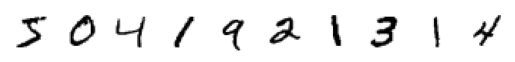

In [13]:
#print first 10 images

import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i]/255., cmap='binary')
    plt.axis('off')
plt.show()

In [18]:
import numpy as np

x_train = x_train[..., np.newaxis]
x_valid = x_valid[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 106s 60ms/step - loss: 0.2085 - accuracy: 0.9373 - val_loss: 0.0474 - val_accuracy: 0.9868
Epoch 2/10
1719/1719 [==============================] - 101s 59ms/step - loss: 0.0831 - accuracy: 0.9757 - val_loss: 0.0424 - val_accuracy: 0.9892
Epoch 3/10
1719/1719 [==============================] - 117s 68ms/step - loss: 0.0620 - accuracy: 0.9814 - val_loss: 0.0381 - val_accuracy: 0.9904
Epoch 4/10
1719/1719 [==============================] - 110s 64ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0341 - val_accuracy: 0.9916
Epoch 5/10
1719/1719 [==============================] - 120s 70ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0408 - val_accuracy: 0.9912
Epoch 6/10
1719/1719 [==============================] - 116s 68ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0388 - val_accuracy: 0.9918
Epoch 7/10
1719/1719 [==============================] - 127s 74ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0344 - accuracy: 0.9916


[0.034433383494615555, 0.991599977016449]

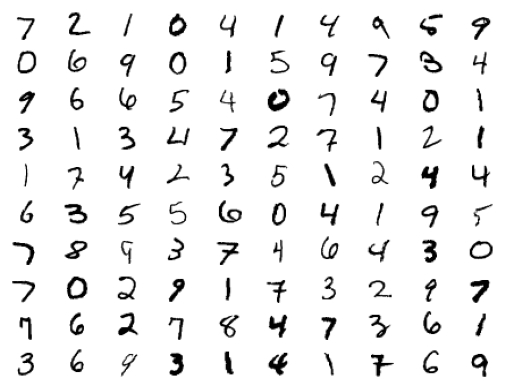

In [52]:
#print first 100 images

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(x_test[i]/255., cmap='binary')
    plt.axis('off')
plt.show()

In [53]:
#predict first 100 images as class labels
y_pred = model.predict(x_test[:100])
print(y_pred.argmax(axis=1).reshape(10, 10))

4/4 [==============================] - 0s 9ms/step
[[7 2 1 0 4 1 4 9 5 9]
 [0 6 9 0 1 5 9 7 3 4]
 [9 6 6 5 4 0 7 4 0 1]
 [3 1 3 4 7 2 7 1 2 1]
 [1 7 4 2 3 5 1 2 4 4]
 [6 3 5 5 6 0 4 1 9 5]
 [7 8 9 3 7 4 6 4 3 0]
 [7 0 2 9 1 7 3 2 9 7]
 [7 6 2 7 8 4 7 3 6 1]
 [3 6 9 3 1 4 1 7 6 9]]


In [54]:
model.evaluate(x_test[:100], y_test[:100])

4/4 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 1.0000


[0.0011339400662109256, 1.0]